# 二极 CCT 内外两层洛伦兹力分布

In [6]:
from cctpy import *
from cctpy_ext import *

In [7]:
# 建立内网两层 CCT
R = 0.95; rin = 113*MM; rout = 128*MM;
tain = [30]; taout = [150]; wn = 128; I = 9206;
benda = 67.5; bendr = BaseUtils.angle_to_radian(benda);

In [8]:
cct_in = CCT(
    local_coordinate_system=LocalCoordinateSystem.global_coordinate_system(),
    big_r=R, small_r=rin, bending_angle=benda,
    tilt_angles=tain, winding_number=wn,
    current=I, starting_point_in_ksi_phi_coordinate=P2.origin(),
    end_point_in_ksi_phi_coordinate=P2(
        wn*2*math.pi, bendr),
    disperse_number_per_winding=36
)

cct_out = CCT(
    local_coordinate_system=LocalCoordinateSystem.global_coordinate_system(),
    big_r=R, small_r=rout, bending_angle=benda,
    tilt_angles=taout, winding_number=wn,
    current=I, starting_point_in_ksi_phi_coordinate=P2.origin(),
    end_point_in_ksi_phi_coordinate=P2(
        -wn*2*math.pi, bendr),
    disperse_number_per_winding=36
)

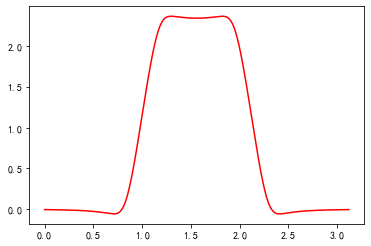

In [9]:
# 验证磁场分布
ccts = Magnets(cct_in,cct_out)

traj = (
    Trajectory.set_start_point(
        P2(R, -1)).first_line(P2.y_direct(), 1.0)
    .add_arc_line(R, False, benda).add_strait_line(1.0)
)

bz = ccts.magnetic_field_bz_along(traj)

Plot2.plot(bz)

In [10]:
# 转为 wire
wcct_in = Wire.create_by_cct(cct_in)
wcct_out = Wire.create_by_cct(cct_out)

In [12]:
# 查看内层洛伦兹力
def task(s):
    fon = wcct_in.lorentz_force_on_wire(
        s=BaseUtils.angle_to_radian(s),
        delta_length=r * BaseUtils.angle_to_radian(5),
        local_coordinate_point=LocalCoordinateSystem.global_coordinate_system(),
        # local_coordinate_point=LocalCoordinateSystem(
        #     location=wire.line3.point_at(BaseUtils.angle_to_radian(s)),
        #     x_direction=wire.line3.direct_at(
        #         BaseUtils.angle_to_radian(s)),
        #     z_direction=cct.bipolar_toroidal_coordinate_system.main_normal_direction_at(
        #         cct.p2_function(BaseUtils.angle_to_radian(s))
        #     )
        # ),
        other_magnet=cct_out
    )
    print(fon)
    return fon

# ss = BaseUtils.linspace(5, 128*360-5, 128*36)
ss = BaseUtils.linspace(5+64*360, 360-5+64*360, 36)

print(task(ss[0]))
print(task(ss[10]))

BaseUtils.i_am_sure_my_code_closed_in_if_name_equal_main()
fons = BaseUtils.submit_process_task(task=task, param_list=[[s] for s in ss])

data = []
for i in range(len(fons)):
    p, f = fons[i]
    data.append([i+1, p.x, p.y, p.z, f.x, f.y, f.z])

data = numpy.array(data)
Plot2.plot_ndarry2ds(data[:, (0, 4)], describe='r-')
Plot2.plot_ndarry2ds(data[:, (0, 5)], describe='b-')
Plot2.plot_ndarry2ds(data[:, (0, 6)], describe='y-')
Plot2.show()



([0.8725023185158565, 0.6062578503627913, 0.011093160551319712], [12.53556538112686, 11.37734416049091, -2.167152886686618])
([0.8725023185158565, 0.6062578503627913, 0.011093160551319712], [12.53556538112686, 11.37734416049091, -2.167152886686618])
([0.6381100950367931, 0.6467970500517594, 0.10513795652542966], [-21.712424380255264, 10.941459847979209, -8.599168337537215])
([0.6381100950367931, 0.6467970500517594, 0.10513795652542966], [-21.712424380255264, 10.941459847979209, -8.599168337537215])
处理并行任务，任务数目36，并行等级16
